## Name : Gözde Çetinkaya

I hereby declare that I observed the honour code of the university when preparing the homework.

### Variational Bayes and EM

Deadline: 31 May

Do Exercise Number 42 (AR Model) from the booklet and commit your derivations and implementations as a notebook

### Part 1
Consider the following model:

In [1]:
%%latex
\begin{align}
A \sim \mathcal{N}(A; 0, 1.2)\\
R \sim \mathcal{IG}(R; 0.4,250)\\
x_{k}|x_{k-1}, A, R \sim \mathcal{N}(x_{k}; Ax_{k-1}, R)\\
x_{0}=1, x_{1}=-6
\end{align}

<IPython.core.display.Latex object>

#### 1.  Draw the directed graphical model and the factor graph


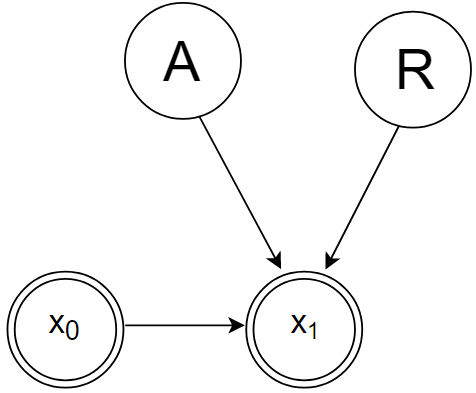

In [3]:
from IPython.display import Image
Image(filename='g1.png')

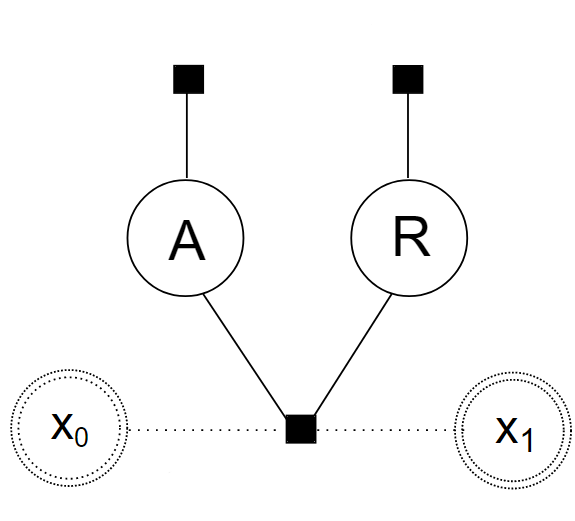

In [40]:
from IPython.display import Image
Image(filename='g2.png')

#### 2.  Write the expression for the full joint distribution and assign terms to the individual factors on the factor graph

In [18]:
%%latex
\begin{align}
p(A,R,x_{k-1},x_{k}) \propto p(A)p(R)p(x_{k}|x_{k-1},A,R)\\
\propto exp \left [ -\frac{x_{1}^2}{2R}+x_{k-1}x_{k}\frac{A}{R}-\frac{x_{k-1}^2A^2}{2R}-\frac{1}{2}log2\pi R\right ]exp\left [-\frac{A^2}{2P} \right ]exp\left [-(\nu+1)logR-\frac{\nu}{\beta R} \right ]
\end{align}

<IPython.core.display.Latex object>

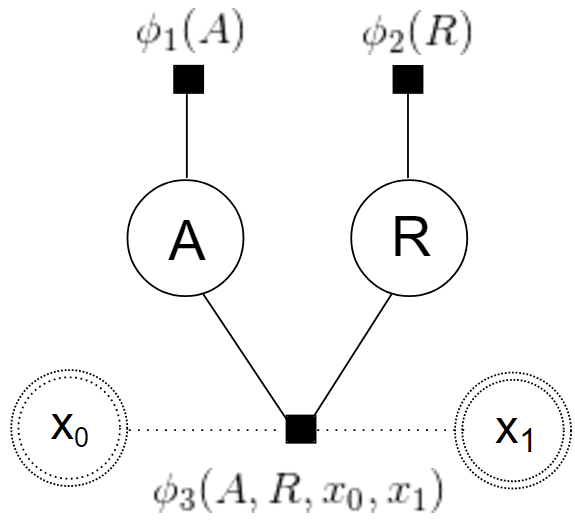

In [41]:
from IPython.display import Image
Image(filename='g3.png')

In [1]:
%%latex
\begin{align}
\phi _{1}(A)=-\frac{A^2}{2P}\\
\phi _{2}(R)=-(\nu+1+1/2)logR\\
\phi _{3}(A,R,x_{0},x_{1})=x_{0}x_{1}\frac{A}{R}-\frac{x_{0}^2A^2}{2R}
\end{align}

<IPython.core.display.Latex object>

#### 3.  Derive the full conditional distributions


In [1]:
%%latex
$p(A|R,x_{0},x_{1})$ is proportional to full joint distribution as a function of A:
\begin{align}
p(A|R,x_{0},x_{1}) \propto exp \left [ x_{0}x_{1}\frac{A}{R} -\frac{A^2}{2}\left ( \frac{x_{0}^2}{R}+\frac{1}{P} \right )

 \right ]
\end{align}

$p(R|A,x_{0},x_{1})$ is proportional to full joint distribution as a function of R:
\begin{align}
p(R|A,x_{0},x_{1}) \propto exp\left [ -\frac{x_{1}^2}{2R}+x_{0}x_{1}\frac{A}{R}-\frac{x_{0}^2A^2}{2R}-\frac{1}{2}log2\pi R-(\nu +1)logR-\frac{\nu }{\beta R} \right ]
\end{align}


<IPython.core.display.Latex object>

#### 4. Derive the joint distribution and create a contour plot

In [2]:
%%latex
\begin{align}
p(A,R,x_{k-1},x_{k}) \propto p(A)p(R)p(x_{k}|x_{k-1},A,R)\\
p(A,R,x_{0}=1,x_{1}=-6) \propto exp \left [ -\frac{1}{2R}-\frac{6A}{R}-\frac{A_2}{2}\left [ \frac{1}{2R}+\frac{1}{1.2}\right ]-\frac{1}{2}log2\pi R-(0.4+1)logR-\frac{1}{250R} \right ]
\end{align}

<IPython.core.display.Latex object>

## Part 2

##### 1 & 2 After derivations, updates for A and R are shown below:

In [45]:
from __future__ import division
import math
import numpy as np
import random

nu=0.4
beta=100
P=1.2 
x_0=1
x_1=-6

T=100
A = np.zeros(T)
R = np.zeros(T)
A[0]=-6
R[0]=0.00001

for t in range(T-1):
    Sig= 1/(1/P + x_0*x_0/R[t])
    mu=Sig*x_0*x_1/R[t]
    R[t+1] = (0.5*x_1*x_1* 0.5*x_0*x_0*(Sig + mu*mu)-x_0*x_1*mu+nu/beta)/(nu + 0.5+1)
    beta=0.5*(x_1*x_1 + x_0*x_0*(A[t]*A[t])-2*x_0*x_1*A[t]) + nu/beta     
    A[t+1] = (alpha/beta*x_0*x_1)/(alpha/beta*x_0 + 1/P)
A,R

(array([-6.        , -5.97785978, -0.06410748, -0.34649794, -0.37930799,
        -0.38340737, -0.38392403, -0.38398922, -0.38399745, -0.38399848,
        -0.38399861, -0.38399863, -0.38399863, -0.38399863, -0.38399863,
        -0.38399863, -0.38399863, -0.38399863, -0.38399863, -0.38399863,
        -0.38399863, -0.38399863, -0.38399863, -0.38399863, -0.38399863,
        -0.38399863, -0.38399863, -0.38399863, -0.38399863, -0.38399863,
        -0.38399863, -0.38399863, -0.38399863, -0.38399863, -0.38399863,
        -0.38399863, -0.38399863, -0.38399863, -0.38399863, -0.38399863,
        -0.38399863, -0.38399863, -0.38399863, -0.38399863, -0.38399863,
        -0.38399863, -0.38399863, -0.38399863, -0.38399863, -0.38399863,
        -0.38399863, -0.38399863, -0.38399863, -0.38399863, -0.38399863,
        -0.38399863, -0.38399863, -0.38399863, -0.38399863, -0.38399863,
        -0.38399863, -0.38399863, -0.38399863, -0.38399863, -0.38399863,
        -0.38399863, -0.38399863, -0.38399863, -0.3